# HW03 <font color=red>(제출기한-6월1일 일요일 자정)</font>
---
Datascience 이해도 평가를 위한 문제입니다.
다음 사항을 주의해서 제출하기 바랍니다.

- 각 문제에 대한 답안을 <font color=red>'답안 작성 셀'</font>라고 적힌 <font color=red>한 코드셀 내</font>에 작성하며 셀 내에서 여러줄로 작성해도 무방합니다.
- 셀을 추가하거나 셀을 삭제하지 않습니다. 예: (<font color=red>'지우지 마시오', '지우지 마시오'</font> 셀 등)
- 출력결과가 미리 제시된 셀(<font color=red>'다음과 같이 출력되어야 한다.'</font>라고 표시된 셀)을 참고합니다.
- 수업시간 배운 내용을 응용하여 코드를 작성합니다.
- 문제나 제출방법에 대한 질문이 있을 경우 제출전 UCLASS 등을 통해 반드시 미리 확인합니다.

> 제출방법

- ULMS HW3 제출란에 <font color=red>'HW03-학번.ipynb'</font>(본인학번을 기입)을 기한내 업로드합니다.


## 가정
- 수업시간에 사용하였던 다음 NBA 연봉 데이터를 이용합니다.

In [40]:
### 지우지 마시오.
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
path_data = 'https://raw.githubusercontent.com/data-8/textbook/refs/heads/main/assets/data/'
nba = Table.read_table(path_data+'nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY').sort(0)
nba

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12
Al Jefferson,C,Charlotte Hornets,13.5
Al-Farouq Aminu,SF,Portland Trail Blazers,8.04289
Alan Anderson,SG,Washington Wizards,4
Alec Burks,SG,Utah Jazz,9.46348
Alex Len,C,Phoenix Suns,3.80712


### 문제1
POSITION 이름 *pos*와 선수 숫자 *N*을 입력받아 해당 포지션에서 연봉이 가장 높은 순서대로 선수 *N*명을 찾아 Table 변수로 리턴하는 함수 ``get_position_top`` 함수를 작성하시오.
- 리턴되는 Table의 column 순서는 원래 Table인 *nba*와 동일하다.
- 리턴되는 Table의 행 순서는 *SALARY*이 감소하는 순으로 정렬한다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [41]:
### 답안 작성 셀
def get_position_top(pos, N):
    a = nba.where('POSITION', pos).sort('SALARY', descending=True).take(np.arange(N))
    return a

get_position_top('C', 4)

PLAYER,POSITION,TEAM,SALARY
Dwight Howard,C,Houston Rockets,22.3594
Marc Gasol,C,Memphis Grizzlies,19.688
Enes Kanter,C,Oklahoma City Thunder,16.4075
DeMarcus Cousins,C,Sacramento Kings,15.852


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
get_position_top('C', 4)

PLAYER,POSITION,TEAM,SALARY
Dwight Howard,C,Houston Rockets,22.3594
Marc Gasol,C,Memphis Grizzlies,19.688
Enes Kanter,C,Oklahoma City Thunder,16.4075
DeMarcus Cousins,C,Sacramento Kings,15.852


### 문제2
각 POSITION별로 SALARY의 최대값과 최소값을 구해 Difference column으로 저장된 *position_diff* Table 변수에 저장하시오.

- 리턴되는 Table의 column 이름은 'POSITION', 'Difference'로 한다.
- 리턴되는 Table은 POSITION 이름 알파벳순으로 정렬한다.


### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [42]:
### 답안 작성 셀
max_salary = nba.select("POSITION", "SALARY").group("POSITION", np.max) # 최대 SALARY
min_salary = nba.select("POSITION", "SALARY").group("POSITION", np.min) # 최소 SALARY
position_diff = max_salary.join("POSITION", min_salary, "POSITION").relabeled(1, "MAX SALARY").relabeled(2, "MIN SALARY") # 두 테이블 조인
position_diff = position_diff.with_column("Difference", position_diff.column("MAX SALARY") - position_diff.column("MIN SALARY")) # Difference 열 추가
position_diff = position_diff.drop("MAX SALARY", "MIN SALARY") # MAX SALARY, MIN SALARY 드랍
position_diff

POSITION,Difference
C,22.2479
PF,22.143
PG,21.413
SF,24.9691
SG,19.9503


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
position_diff

POSITION,Difference
C,22.2479
PF,22.143
PG,21.413
SF,24.9691
SG,19.9503


### 문제3
전체 선수들 중 파라미터 *S*값에 따라 아래 조건을 만족하는 POSITION별 선수 숫자에 대한 Table을 리턴하는 ``position_salary``함수를 완성하시오.
- 전달되는 *S* 값이 양수인 경우 전체 선수들 중 연봉이 *S*보다 큰 선수들에 대해 POSITION별 선수 숫자를 구해 처리한다.
- 전달되는 *S* 값이 음수인 경우 전체 선수들 중 연봉이 *-S*보다 작은 선수들에 대해 POSITION별 선수 숫자를 구해 처리한다.
- *S*=0인 경우는 처리하지 않는다.
- 리턴되는 Table은 POSITION 이름 알파벳순으로 정렬한다.
- 리턴되는 Table의 column 이름은 'POSITION', 'count' 이다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [60]:
### 답안 작성 셀
def position_salary(S):
    if (S > 0): 
        return nba.where("SALARY", are.above(S)).group("POSITION")
    elif (S < 0): 
        return nba.where("SALARY", are.below(-S)).group("POSITION")

position_salary(-1.5)

POSITION,count
C,14
PF,23
PG,19
SF,27
SG,40


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
position_salary(-1.5)

POSITION,count
C,14
PF,23
PG,19
SF,27
SG,40


### 문제4
전체 선수들 중 파라미터 양수 *S*값에 따라 *S* 초과 및 미만에 해당하는 POSITION별 선수 숫자에 대한 Table을 리턴하는 ``count_salary_cut``함수를 완성하시오.
- *S*는 양수값이다.
- 리턴되는 Table은 POSITION 이름 알파벳순으로 정렬한다.
- 리턴되는 Table의 column 이름은 'POSITION', '>S', '<S' 형태이다 (단, 실제 S값으로 대체).

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [65]:
### 답안 작성 셀
def count_salary_cut(S):
    above = nba.where("SALARY", are.above(S)).group("POSITION").relabeled("count", ">" + str(S))
    below = nba.where("SALARY", are.below(S)).group("POSITION").relabeled("count", "<" + str(S))
    
    return above.join("POSITION", below, "POSITION")

count_salary_cut(5.2)

POSITION,>5.2,<5.2
C,27,41
PF,27,58
PG,29,56
SF,26,56
SG,27,69


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
count_salary_cut(5.2)

POSITION,>5.2,<5.2
C,27,41
PF,27,58
PG,29,56
SF,26,56
SG,27,69


### 문제5
*nba* 전체 선수들 중 TEAM 이름이 두 파라미터 *t1*, *t2*중의 하나와 일치하는 선수들을 골라내어 Table로 리턴하는 ``search_two_team``함수를 완성하시오.
- 리턴되는 Table은 PLAYER 이름 알파벳순으로 정렬한다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [75]:
### 답안 작성 셀
def search_two_team(t1,t2):
    return nba.where("TEAM", are.equal_to(t1) | are.equal_to(t2)).sort("PLAYER")

search_two_team('Chicago Bulls','Miami Heat')

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Bobby Portis,PF,Chicago Bulls,1.39116
Chris Bosh,PF,Miami Heat,22.1927
Corey Hawkins,PG,Miami Heat,0.525093
Derrick Rose,PG,Chicago Bulls,20.0931
Doug McDermott,SF,Chicago Bulls,2.38044
Dwyane Wade,SG,Miami Heat,20
E'Twaun Moore,SG,Chicago Bulls,1.01542
Goran Dragic,PG,Miami Heat,14.783
Greg Whittington,SF,Miami Heat,0.525093


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
search_two_team('Chicago Bulls','Miami Heat')

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Bobby Portis,PF,Chicago Bulls,1.39116
Chris Bosh,PF,Miami Heat,22.1927
Corey Hawkins,PG,Miami Heat,0.525093
Derrick Rose,PG,Chicago Bulls,20.0931
Doug McDermott,SF,Chicago Bulls,2.38044
Dwyane Wade,SG,Miami Heat,20
E'Twaun Moore,SG,Chicago Bulls,1.01542
Goran Dragic,PG,Miami Heat,14.783
Greg Whittington,SF,Miami Heat,0.525093


## 가정
- 다음과 같이 가위바위보를 표현하기 위한 배열 *rps*을 다음과 같이 정의합니다.

In [76]:
### 지우지 마시오.
rps=make_array('rock', 'paper', 'scissors')

### 문제6
2명의 사람이 가위바위보를 *N*번 시행하여 비긴 횟수를 리턴하는 함수 count_tie()를 작성하시오.

- *N*은 입력 파라미터이며 default는 100으로 설정한다.
- 위에서 정의한 *rps* 배열을 이용하여 작성한다.
- numpy의 choice 함수를 이용하여 작성한다.
- seed를 설정하는 코드를 넣지 않는다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [91]:
### 답안 작성 셀
def count_tie(N=100):
    a = np.random.choice(rps, N)
    b = np.random.choice(rps, N)
    count = np.count_nonzero(a == b)

    return count

count_tie(2000)

683

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
count_tie(200)

67

### 문제7
위 count_tie()을 이용하여 2명이 *N*번 랜덤하게 가위바위보 했을 때 비긴 횟수를 조사하는 시행을 *T*번 반복하여 그 결과를 배열(collection array)로 리턴하는 함수 ``collect_count_tie`` 를 작성하시오.

- *N*과 *T*은 입력 파라미터이며 default값은 각각 100, 10000으로 설정한다.
- count_tie()를 호출하여 이용한다.
- seed를 설정하는 코드를 넣지 않는다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [102]:
### 답안 작성 셀
def collect_count_tie(N=100, T=10000):
    collection = make_array()
    for _ in np.arange(T):
        collection = np.append(collection, count_tie(N))

    return np.array(collection)

collect_count_tie(200, 100)

array([ 69.,  67.,  63.,  59.,  61.,  60.,  69.,  59.,  76.,  68.,  67.,
        66.,  71.,  68.,  70.,  67.,  60.,  77.,  74.,  70.,  70.,  66.,
        66.,  49.,  74.,  74.,  62.,  72.,  59.,  72.,  66.,  71.,  71.,
        70.,  70.,  65.,  68.,  64.,  59.,  55.,  61.,  72.,  79.,  71.,
        64.,  83.,  62.,  73.,  72.,  76.,  65.,  57.,  75.,  56.,  51.,
        71.,  64.,  73.,  68.,  61.,  66.,  57.,  78.,  67.,  69.,  71.,
        77.,  54.,  55.,  61.,  67.,  68.,  63.,  65.,  78.,  55.,  67.,
        73.,  58.,  64.,  72.,  60.,  69.,  68.,  64.,  78.,  68.,  65.,
        81.,  72.,  59.,  76.,  56.,  73.,  60.,  47.,  69.,  68.,  71.,
        55.])

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
collect_count_tie(200, 100)

array([ 56.,  62.,  49.,  66.,  76.,  68.,  56.,  67.,  70.,  66.,  69.,
        64.,  57.,  82.,  68.,  66.,  67.,  52.,  74.,  74.,  71.,  84.,
        67.,  54.,  75.,  70.,  61.,  67.,  64.,  79.,  71.,  66.,  62.,
        66.,  73.,  77.,  53.,  64.,  64.,  68.,  63.,  66.,  66.,  71.,
        72.,  68.,  71.,  70.,  79.,  70.,  63.,  70.,  61.,  76.,  62.,
        58.,  79.,  58.,  73.,  61.,  63.,  59.,  71.,  70.,  70.,  62.,
        58.,  60.,  78.,  64.,  70.,  64.,  78.,  80.,  43.,  67.,  59.,
        64.,  67.,  66.,  70.,  64.,  70.,  73.,  66.,  73.,  74.,  58.,
        69.,  63.,  59.,  65.,  61.,  60.,  63.,  55.,  79.,  69.,  69.,
        72.])

### 문제8
위 collect_count_tie() 함수를 호출후 그 결과(배열)를 리턴받아 Table 변수 ``simulation100``에 저장하시오.

- collect_count_tie 호출 시 파라미터 값 *N*과 *T*는 100, 100으로 호출한다.
- 리턴되는 Table의 column 이름은 'Repetition', 'No of Ties' 이다.


### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [106]:
### 답안 작성 셀
N = 100
T = 100
simulation100 = Table().with_column("Repetition", np.arange(1, 101)).with_column("No or Ties", collect_count_tie(N, T))
simulation100

Repetition,No or Ties
1,33
2,41
3,24
4,30
5,31
6,30
7,24
8,35
9,33
10,26


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
simulation100

Repetition,No of Ties
1,25
2,34
3,33
4,43
5,40
6,24
7,36
8,38
9,29
10,36


### 문제9
위 문제와 동일하게 collect_count_tie() 함수를 이용하되 *N=100*, *T=10000*인 경우에 대해 Table 변수 ``simulation10000``에 저장하시오.

- *N*과 *T*는 100, 10000으로 호출한다.
- 리턴되는 Table의 column 이름은 'Repetition', 'No of Ties' 이다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [108]:
### 답안 작성 셀
N = 100
T = 10000
simulation10000 = Table().with_column("Repetition", np.arange(1, 10001)).with_column("No or Ties", collect_count_tie(N, T))
simulation10000

Repetition,No or Ties
1,34
2,42
3,36
4,29
5,33
6,28
7,30
8,30
9,27
10,33


In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
simulation10000

Repetition,No of Ties
1,31
2,39
3,36
4,34
5,32
6,34
7,31
8,29
9,33
10,33


### 문제10
위에서 구한 *simulation100*, *simulation10000*에 대해 'No of Ties'의 중앙값(median)을 각각 *m100*, *m10000*에 저장하시오.
- numpy의 median() 함수를 이용하여 중앙값을 구한다.

### 답안을 작성하시오.
- 아래 한 개의 셀에 답을 작성하되 셀을 추가하지 말 것

In [115]:
### 답안 작성 셀
m100 = np.median(simulation100.column("No or Ties"))
m10000 = np.median(simulation10000.column("No or Ties"))
m100, m10000

(33.0, 33.0)

In [ ]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
m100, m10000

(33.0, 33.0)

### 추가) 위 *simulation100*과 *simulation10000*의 histogram을 그려보고 비교해 보시오.

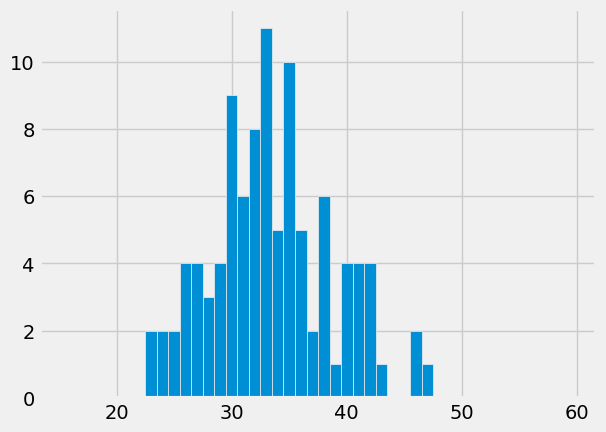

In [116]:
# simulation100 의 historgram : bins=np.arange(15.5, 60.1, 1) 로 설정
plots.hist(simulation100.column("No or Ties"), bins=np.arange(15.5, 60.1, 1))
plots.show()

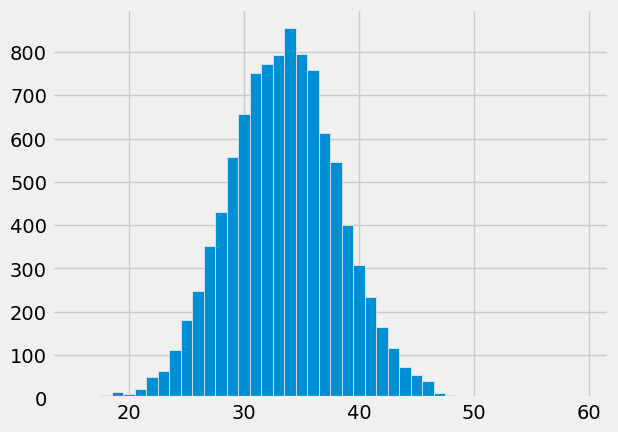

In [118]:
# simulation10000 의 historgram : bins=np.arange(15.5, 60.1, 1) 로 설정
plots.hist(simulation10000.column("No or Ties"), bins=np.arange(15.5, 60.1, 1))
plots.show()